In [17]:
import pandas as pd
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt
ot.Log.Show(ot.Log.NONE)

Here we would like to generate a fairing with some random variations in geometry

Load an estimated fairing geometry

In [18]:
lgfairing_df = pd.read_csv("../src/lgtoldes/data/leg_fairing_est_frontier.csv")

In [19]:
lgfairing_df

,ID,X,Y,Z
0,A,0.000000,0.000000,0.000000
1,B,391.974615,28.079062,-75.412941
2,C,392.954671,161.026229,-88.394064
3,D,308.242426,164.238162,-72.992377
4,E,292.004781,175.202883,-71.563039
5,F,244.235767,297.249571,-77.456552
6,G,214.660121,317.299232,-76.658014
7,H,2.821952,255.570451,-26.404373


In [20]:
lgfairing_np = lgfairing_df.to_numpy()

In [21]:
lgfairing_df[lgfairing_df['ID'] == 'D']['X']

3    308.242426
Name: X, dtype: float64

In [22]:
x = lgfairing_df[lgfairing_df['ID'] == 'D']['X']
y = lgfairing_df[lgfairing_df['ID'] == 'D']['Y']
z = lgfairing_df[lgfairing_df['ID'] == 'D']['Z']
(x,y,z)

(3    308.242426
 Name: X, dtype: float64,
 3    164.238162
 Name: Y, dtype: float64,
 3   -72.992377
 Name: Z, dtype: float64)

In [23]:
lgfairing_np[:,1:]

array([[0.0, 0.0, 0.0],
       [391.9746146, 28.07906223, -75.41294083],
       [392.9546705, 161.0262295, -88.39406433],
       [308.2424264, 164.2381618, -72.99237652],
       [292.0047815, 175.2028833, -71.56303869],
       [244.2357671, 297.2495706, -77.45655228],
       [214.6601213, 317.2992323, -76.6580145],
       [2.821951884, 255.5704508, -26.40437344]], dtype=object)

In [24]:
ot.PointCollection(lgfairing_np[:,1:])

[class=Point name=Unnamed dimension=3 values=[0,0,0],class=Point name=Unnamed dimension=3 values=[391.975,28.0791,-75.4129],class=Point name=Unnamed dimension=3 values=[392.955,161.026,-88.3941],class=Point name=Unnamed dimension=3 values=[308.242,164.238,-72.9924],class=Point name=Unnamed dimension=3 values=[292.005,175.203,-71.563],class=Point name=Unnamed dimension=3 values=[244.236,297.25,-77.4566],class=Point name=Unnamed dimension=3 values=[214.66,317.299,-76.658],class=Point name=Unnamed dimension=3 values=[2.82195,255.57,-26.4044]]

In [26]:
lgfairing_np[1,0]

'B'

In [27]:
b = ot.Point(lgfairing_np[1,1:])

In [34]:
normal = ot.Normal()
uniform = ot.Uniform()
distribution = ot.ComposedDistribution([uniform, uniform, uniform])
distribution

class=ComposedDistribution name=ComposedDistribution dimension=3 copula=class=IndependentCopula name=IndependentCopula dimension=3 marginal[0]=class=Uniform name=Uniform dimension=1 a=-1 b=1 marginal[1]=class=Uniform name=Uniform dimension=1 a=-1 b=1 marginal[2]=class=Uniform name=Uniform dimension=1 a=-1 b=1

In [35]:
sample3 = distribution.getSample(1000)
sample3[:,0:2]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=1000 dimension=2 description=[X0,X1] data=[[-0.483146,-0.836299],[0.698741,0.00632232],[-0.731075,-0.297832],...,[0.912198,0.404477],[-0.897112,-0.736581],[0.0463131,-0.383412]]

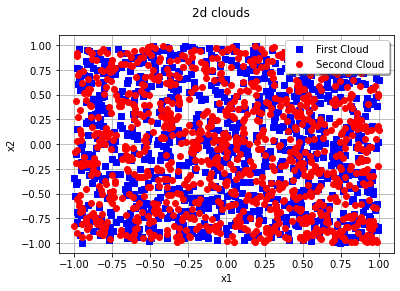

In [36]:
cloud1 = ot.Cloud(sample3[:,0:2], 'blue', 'fsquare', 'First Cloud')
cloud2 = ot.Cloud(sample3[:,[0,2]], 'red', 'fcircle', 'Second Cloud')

# Then, assemble it into a graph
myGraph2d = ot.Graph('2d clouds', 'x1', 'x2', True, 'topright')
myGraph2d.add(cloud1)
myGraph2d.add(cloud2)
view = viewer.View(myGraph2d)

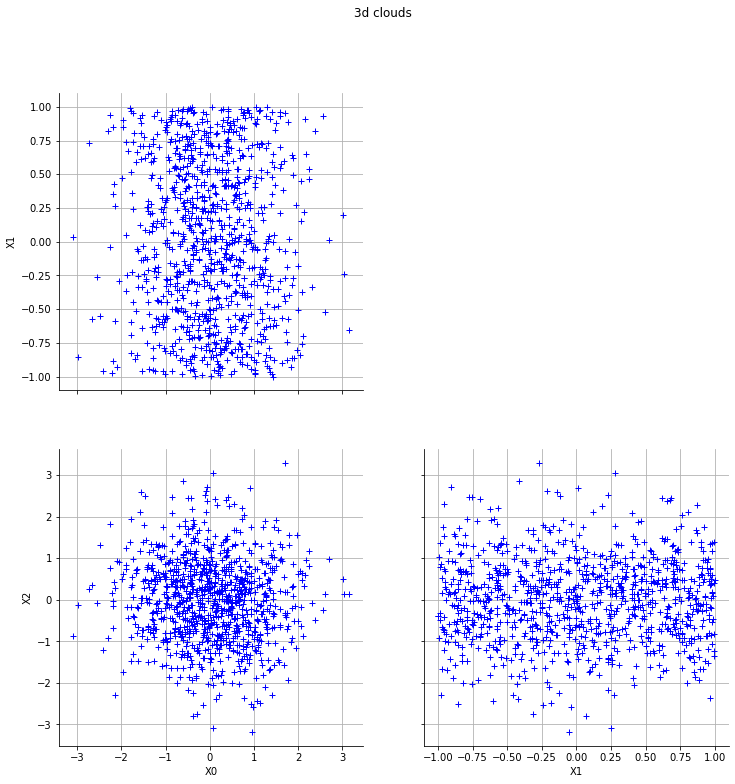

In [31]:
graph3 = ot.VisualTest.DrawPairs(sample3)
graph3.setTitle('3d clouds')
view = viewer.View(graph3)
plt.show()

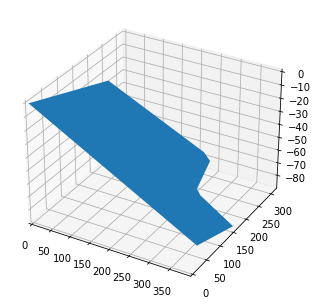

In [65]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
x = [0,1,1,0]
y = [0,0,1,1]
z = [0,1,0,1]
verts = [list(zip(x,y,z))]
verts = [[tuple(x) for x in list(lgfairing_np[:,1:])]]
ax.add_collection3d(Poly3DCollection(verts))
ax.set_xlim3d(min(lgfairing_np[:,1]),max(lgfairing_np[:,1]))
ax.set_ylim3d(min(lgfairing_np[:,2]),max(lgfairing_np[:,2]))
ax.set_zlim3d(min(lgfairing_np[:,3]),max(lgfairing_np[:,3]))
plt.show()

In [50]:
[list(zip(x,y,z))]

[[(0, 0, 0), (1, 0, 1), (1, 1, 0), (0, 1, 1)]]

In [44]:
list(lgfairing_np[:,1:])

[array([0.0, 0.0, 0.0], dtype=object),
 array([391.9746146, 28.07906223, -75.41294083], dtype=object),
 array([392.9546705, 161.0262295, -88.39406433], dtype=object),
 array([308.2424264, 164.2381618, -72.99237652], dtype=object),
 array([292.0047815, 175.2028833, -71.56303869], dtype=object),
 array([244.2357671, 297.2495706, -77.45655228], dtype=object),
 array([214.6601213, 317.2992323, -76.6580145], dtype=object),
 array([2.821951884, 255.5704508, -26.40437344], dtype=object)]

In [52]:
newlist = [[tuple(x) for x in list(lgfairing_np[:,1:])]]

In [64]:
max(lgfairing_np[:,1])

392.9546705